# Algorithm 2

### PART 1 -  
#### Execute KMeans. 
Try to find automatticaly the 'elbow' - the best K results ( withour relating to the daily hours or to the number of resources).

### PART 2 - 
#### Order The Clusters.
 * 2a- Index all datapoints (jobs) in a cluster with the same index, when indexing is according to the distance between the clusters.
 * 2b- Execute Shortest Path algorithm at each cluster, connect the cluster by the closest datapoints (jobs). (Index each datapoint with different index)

In [1]:
import sys
import numpy as np # used for scientific computing\n",
import pandas as pd # used for data analysis and manipulation\n",
import matplotlib.pyplot as plt # used for visualization and plotting\n",
import matplotlib.cm as cm
import math
from sklearn.cluster import KMeans 
import heapq

In [2]:
name_of_file = 'second_datadet'

In [3]:
# read the data
df = pd.read_excel(f'Data/{name_of_file}.xlsx')

In [4]:
# verify the data
df

,_,Id,AppointmentNumber,Latitude,Longitude,IDC_Index__c
0,[ServiceAppointment],08p4L000000lKERQA2,SA-4051,19.476372,-99.179075,NaN
1,[ServiceAppointment],08p4L000000lKESQA2,SA-4052,19.476439,-99.179061,NaN
2,[ServiceAppointment],08p4L000000lKETQA2,SA-4053,19.476439,-99.179061,NaN
3,[ServiceAppointment],08p4L000000lKEUQA2,SA-4054,19.476439,-99.179061,NaN
4,[ServiceAppointment],08p4L000000lKEVQA2,SA-4055,19.476461,-99.179056,NaN
...,...,...,...,...,...,...
1495,[ServiceAppointment],08p4L000000lKBOQA2,SA-3862,19.477986,-99.179773,NaN
1496,[ServiceAppointment],08p4L000000lKBXQA2,SA-3871,19.477986,-99.179773,NaN
1497,[ServiceAppointment],08p4L000000lKBYQA2,SA-3872,19.477986,-99.179773,NaN
1498,[ServiceAppointment],08p4L000000lKBZQA2,SA-3873,19.477986,-99.179773,NaN


In [5]:
def plot(c): 
    plt.scatter(df['Latitude'], df['Longitude'], color=c)

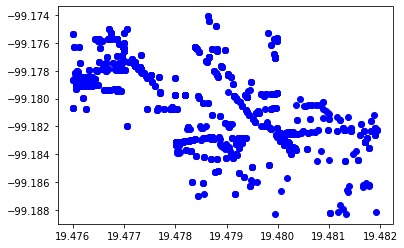

In [6]:
# map of the jobs
plot('blue')

In [7]:
# extract the relvent columns
dataset = np.array(df[['Latitude', 'Longitude']])

In [8]:
# verify the exctraction
dataset

array([[ 19.476372, -99.179075],
       [ 19.476439, -99.179061],
       [ 19.476439, -99.179061],
       ...,
       [ 19.477986, -99.179773],
       [ 19.477986, -99.179773],
       [ 19.477986, -99.179773]])

# PART 1 - KMEANS

In [9]:
# K to check for the KMeans
Ks = [k for k in range(4, 150)]

In [10]:
# execute KMeans for each K in Ks
inertia_lst = []
for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=0)
    # fit the data
    _ = kmeans.fit_predict(dataset)
    # save inertia
    inertia_lst.append(kmeans.inertia_)

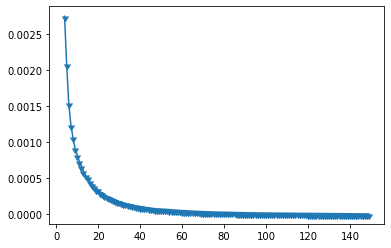

In [11]:
# plot inertia as function of number of clusers (k)
plt.plot(Ks, inertia_lst, marker=11)

finding the elbow is the method to find the best K. 
The solution is not optimal which means it is not return the best result any time.
In contrast, the result will be always close to the truth and the small error may not affect on our results drastically.

In [12]:
# finding the elbow
length = len(inertia_lst) - 1

# delta_1: index=0 -> #cluster=2 -> best_k_idx=1
delta_1 = [inertia_lst[i] - inertia_lst[i+1] for i in range(length)]

# delta_2: index 0 -> #cluster=3 -> best_k_idx=2
delta_2 = [delta_1[i] - delta_1[i+1] for i in range(length - 1)]

strength = [(i, delta_2[i+1] - delta_1[i+2]) for i in range(length - 2) if delta_1[i+1] >= 0 and delta_2[i+1] >= 0]

best_k_idx = max(strength,key=lambda t: t[1])[0] + 2
best_k = Ks[best_k_idx]

In [13]:
# get the best KMeans , n_clusters=best_k
best_kmeans = KMeans(n_clusters=best_k, random_state=0)

In [14]:
# seperate the instances to clusters

# get labels 
labels = best_kmeans.fit_predict(dataset)

# init dictionary
dict_of_clusters = {cluster: [] for cluster in range(best_k)}

for idx, instance in enumerate(dataset):
    dict_of_clusters[labels[idx]].append(instance)

In [15]:
# print cluster sizes
for cluster, instances in dict_of_clusters.items():
    print(f'------Cluster {cluster}: {len(instances)} jobs --------')
    print()

------Cluster 0: 31 jobs --------

------Cluster 1: 120 jobs --------

------Cluster 2: 38 jobs --------

------Cluster 3: 96 jobs --------

------Cluster 4: 153 jobs --------

------Cluster 5: 37 jobs --------

------Cluster 6: 20 jobs --------

------Cluster 7: 114 jobs --------

------Cluster 8: 40 jobs --------

------Cluster 9: 65 jobs --------

------Cluster 10: 237 jobs --------

------Cluster 11: 59 jobs --------

------Cluster 12: 117 jobs --------

------Cluster 13: 59 jobs --------

------Cluster 14: 19 jobs --------

------Cluster 15: 58 jobs --------

------Cluster 16: 69 jobs --------

------Cluster 17: 129 jobs --------

------Cluster 18: 39 jobs --------



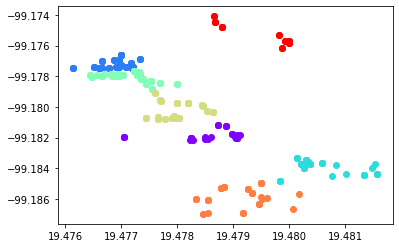

In [16]:
# plot the results
clusters = [c for c in range(best_k)]
colors = cm.rainbow(np.linspace(0, 1, Ks[3]))
for cluster, c in zip(clusters, colors):
    data = np.array(dict_of_clusters[cluster])
    plt.scatter(data[:, 0], data[:, 1], color=c)

# PART 2 - Order The Clusters 

In [17]:
# centers (centroids) of clusters
centers = best_kmeans.cluster_centers_

In [18]:
# radius of the Earth
R = 6373.0

def compute_distance(place_1, place_2):
    """
    compute the distance between two lat-long coordinates

    Input:

    place_1 - tuple : (latitude, longitude) of place 1
    place_2 - tuple : (latitude, longitude) of place 2

    Returns:
    distance - float number 
    """    
    
    distance_lat = place_2[0] - place_1[0]
    distance_long = place_2[1] - place_1[1]

    #Haverinse formula 
    x = math.sin(distance_lat / 2)**2 + math.cos(place_1[0]) * math.cos(place_2[0]) * math.sin(distance_long / 2)**2

    y = 2 * math.atan2(math.sqrt(x), math.sqrt(1 - x))

    return R * y

### 2a -
- Order the cluster according to the distances between them. 
- All data points in the same cluster will get the same index.

In [19]:
# order the clusters according to distance from cluster 0 

d_array = [(0,0)]
c_0 = centers[0]
for idx, c in enumerate(centers[1:]):
    d_array += [(compute_distance(c_0, c), idx + 1)]
cluster_distance = sorted(d_array, key=lambda x: x[0]) 

dict_cluster_to_idx = {c[1] : idx for idx, c in enumerate(cluster_distance)}

idx_res_column = []

# for each row add the relevent number according to the order of the clusters
for label in labels:
    idx_res_column += [dict_cluster_to_idx[label]]    

In [20]:
# add the column to the dataFrame
df['IDC_Index__c'] = idx_res_column

In [21]:
# craete result new excel
df.to_excel(f'results_{name_of_file}_(2a).xlsx', sheet_name='results')

### 2b - 
Order the cluters by executing shortest path algorithm on each cluster. 

In [22]:
# seprate the datapoints according to their cluster
# save id = job's row.
separate_dataset = [[] for cluster in range(best_k)]
id = 0
for datapoint, label in zip(dataset, labels):
    separate_dataset[label].append((id, datapoint))
    id += 1

Shoretest path Algorithm: 
### Dijkstra algorithm

- We execute SP on every cluster according to the order we achieved above.
- Fisrt iteration: 
    - Startpoint: take random datapoint
    - Endpoint: random datapoint from the next cluster
- Next iterations:
    - StartPoint: the endpoint from the previous iteration
    - Endpoint: random datapoint from the next cluster

In [23]:
# save the oredr of the clusters
cluster_order = [c[1] for c in cluster_distance]

In [24]:
MAX_VALUE = sys.float_info.max

In [25]:
class Vertex: 
    
    def __init__(self, job, is_root=False):
        self.id = job[0]
        self.place = job[1]
        self.distance = 0 if (is_root) else MAX_VALUE
        self.parent = None


    def relax(self, v):
        distance_from_self_to_v = compute_distance(self.place, v.place) 
        if v.distance > self.distance + distance_from_self_to_v:
            v.distance = self.distance + distance_from_self_to_v
            v.parent = self.id
            
    # implemt =, < for using heapq on vertex
    def __eq__(self, other):
        if self.distance == other.distance:
            return True
        else:
            return False

    def __lt__(self, other):
        if self.distance < other.distance:
            return True
        else:
            return False

In [26]:
idx = 0
results = []
for cluster in range(best_k):
    root = Vertex(separate_dataset[cluster][0], is_root=True)
    G = [Vertex(datapoint) for datapoint in separate_dataset[cluster][1:]]
    G.append(root)
    # we do not use E since there are edges between all the vertices
    #E = [(v1.id, v2.id) for v1 in G for v2 in G]

    # ------- Execute DIJKSTRA -------- #
    priority_queue = []
    #push all vertices
    for v in G:
        heapq.heappush(priority_queue, v)
    while priority_queue != []:
        # dequeue the smallest vertex (according to the distance field)
        u = heapq.heappop(priority_queue)
        results.append((u.id, idx)) #u.index = idx  ->. at Dijkstra the first to leave th queue is the closet to the begining
        for v in G:
            u.relax(v)
        idx +=1

In [27]:
#sort result according to rows order ('id')
results.sort(key=lambda row: row[0])
results = [row[1] for row in results]

In [28]:
# add the column to the dataFrame
df['IDC_Index__c'] = results

In [29]:
# craete result new excel
df.to_excel(f'results_{name_of_file}_(2b).xlsx', sheet_name='results')

### 2c -
- For each cluster perform Kmeans inside him and create sub-cluster
- Order the cluster according to the distances between them. 
- All data points in the same sub-cluster will get the same index.

In [39]:
df = pd.read_excel(f'results_{name_of_file}_(2a).xlsx')

In [40]:
# K to check for the KMeans
Ks = [k for k in range(2, 10)]

In [41]:
dict_of_clusters_2c = {}
index_2c = 0

for cluster in clusters:
    #todo
    dataset = dict_of_clusters[cluster]
    inertia_lst = []
    print(f'cluster : {cluster} length:  {len(dataset)}')
    if(len(dataset) > 10):
        for k in Ks:
            kmeans = KMeans(n_clusters=k, random_state=0)
            # fit the data
            _ = kmeans.fit_predict(dataset)
            # save inertia
            inertia_lst.append(kmeans.inertia_)
        # plot inertia as function of number of clusers (k)
    
        #print(plt.plot(Ks, inertia_lst, marker=11))
    
        # finding the elbow
        length = len(inertia_lst) - 1

        # delta_1: index=0 -> #cluster=2 -> best_k_idx=1
        delta_1 = [inertia_lst[i] - inertia_lst[i+1] for i in range(length)]

        # delta_2: index 0 -> #cluster=3 -> best_k_idx=2
        delta_2 = [delta_1[i] - delta_1[i+1] for i in range(length - 1)]

        strength = [(i, delta_2[i+1] - delta_1[i+2]) for i in range(length - 2) if delta_1[i+1] >= 0 and delta_2[i+1] >= 0]

        best_k_idx = max(strength,key=lambda t: t[1])[0] + 2
        best_k = Ks[best_k_idx]
    
        # get the best KMeans , n_clusters=best_k
        best_kmeans = KMeans(n_clusters=best_k, random_state=0)
    
        # seperate the instances to clusters

        # get labels 
        labels = best_kmeans.fit_predict(dataset)

        # init dictionary
        dict_of_clusters_2 = {cluster: [] for cluster in range(best_k)}

        for idx, instance in enumerate(dataset):
            dict_of_clusters_2[labels[idx]].append(instance)
        
        # print cluster sizes
        for cluster, instances in dict_of_clusters_2.items():
            #print(f'------Cluster {cluster}: {len(instances)} jobs --------')
            #print()
            dict_of_clusters_2c.update({index_2c: instances}) 
            index_2c += 1
        
        # centers (centroids) of clusters
        centers = best_kmeans.cluster_centers_
    
    else:
        dict_of_clusters_2c.update({index_2c: dataset}) 
        index_2c += 1
            
    
#print(centers)

cluster : 0 length:  31
cluster : 1 length:  120
cluster : 2 length:  38
cluster : 3 length:  96
cluster : 4 length:  153
cluster : 5 length:  37
cluster : 6 length:  20
cluster : 7 length:  114


C:\Users\yonat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


cluster : 8 length:  40
cluster : 9 length:  65
cluster : 10 length:  237
cluster : 11 length:  59
cluster : 12 length:  117
cluster : 13 length:  59
cluster : 14 length:  19
cluster : 15 length:  58
cluster : 16 length:  69
cluster : 17 length:  129
cluster : 18 length:  39


In [42]:
for cluster, instances in dict_of_clusters_2c.items():
    for instance in instances:
        inds = np.where(np.logical_and(df['Latitude'].values  == instance[0],df['Longitude'].values == instance[1]))[0]
        print(np.logical_and(df['Latitude'].values  == instance[0],df['Longitude'].values == instance[1]))
        print(inds)
        print(instance, cluster)
        print(df[['Latitude','Longitude']].iloc[inds])
        df['IDC_Index__c'].iloc[inds] = cluster
        print(df['IDC_Index__c'].iloc[inds])

[False False False ... False False False]
[378 403 404]
[ 19.478973 -99.181735] 0
      Latitude  Longitude
378  19.478973 -99.181735
403  19.478973 -99.181735
404  19.478973 -99.181735
378    0
403    0
404    0
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[382]
[ 19.479025 -99.181982] 0
      Latitude  Longitude
382  19.479025 -99.181982
382    0
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[390]
[ 19.479114 -99.181827] 0
      Latitude  Longitude
390  19.479114 -99.181827
390    0
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[395]
[ 19.479056 -99.181839] 0
      Latitude  Longitude
395  19.479056 -99.181839
395    0
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[378 403 404]
[ 19.478973 -99.181735] 0
      Latitude  Longitude
378  19.478973 -99.181735
403  19.478973 -99.181735
404  19.478973 -99.181735
378    0
403    0
404    0
Name: IDC_Index__c, dtype: int64
[Fal

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

[ 900  901  902  903  904  910  911  912  913  914  915  916  922  923
  932  933  934  936  943  944  946  959  960  961  962  963  965  967
  978 1001 1002 1008 1009 1010 1011 1018 1019 1027 1029 1030 1044 1045
 1046 1047 1054 1055 1056 1057 1058 1071 1072 1073 1074 1075 1077 1078
 1079 1080 1081 1083 1084 1085 1086]
[ 19.47696 -99.17694] 5
      Latitude  Longitude
900   19.47696  -99.17694
901   19.47696  -99.17694
902   19.47696  -99.17694
903   19.47696  -99.17694
904   19.47696  -99.17694
...        ...        ...
1081  19.47696  -99.17694
1083  19.47696  -99.17694
1084  19.47696  -99.17694
1085  19.47696  -99.17694
1086  19.47696  -99.17694

[63 rows x 2 columns]
900     5
901     5
902     5
903     5
904     5
       ..
1081    5
1083    5
1084    5
1085    5
1086    5
Name: IDC_Index__c, Length: 63, dtype: int64
[False False False ... False False False]
[ 900  901  902  903  904  910  911  912  913  914  915  916  922  923
  932  933  934  936  943  944  946  959  960  961  

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 


1052    9
1059    9
1060    9
1061    9
1062    9
1063    9
1064    9
1065    9
1076    9
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[233 234 342]
[ 19.47733  -99.176872] 10
     Latitude  Longitude
233  19.47733 -99.176872
234  19.47733 -99.176872
342  19.47733 -99.176872
233    10
234    10
342    10
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[233 234 342]
[ 19.47733  -99.176872] 10
     Latitude  Longitude
233  19.47733 -99.176872
234  19.47733 -99.176872
342  19.47733 -99.176872
233    10
234    10
342    10
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[233 234 342]
[ 19.47733  -99.176872] 10
     Latitude  Longitude
233  19.47733 -99.176872
234  19.47733 -99.176872
342  19.47733 -99.176872
233    10
234    10
342    10
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[1049 1050 1051]
[ 19.477163 -99.177134] 10
       Latitude  Longitude
1049  19.477163 -99.17713

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

172     21
173     21
1456    21
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[ 172  173 1456]
[ 19.477988 -99.178492] 21
       Latitude  Longitude
172   19.477988 -99.178492
173   19.477988 -99.178492
1456  19.477988 -99.178492
172     21
173     21
1456    21
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[ 155  158 1422]
[ 19.47768 -99.17842] 21
      Latitude  Longitude
155   19.47768  -99.17842
158   19.47768  -99.17842
1422  19.47768  -99.17842
155     21
158     21
1422    21
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[ 172  173 1456]
[ 19.477988 -99.178492] 21
       Latitude  Longitude
172   19.477988 -99.178492
173   19.477988 -99.178492
1456  19.477988 -99.178492
172     21
173     21
1456    21
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[224 238 241 301 302 303 304 305 306 325 344 345 351 363 921]
[ 19.47733  -99.177878] 22
     Latitude  Longitude
224 

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

     Latitude  Longitude
139  19.47777 -99.180785
144  19.47777 -99.180785
145  19.47777 -99.180785
139    25
144    25
145    25
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[139 144 145]
[ 19.47777  -99.180785] 25
     Latitude  Longitude
139  19.47777 -99.180785
144  19.47777 -99.180785
145  19.47777 -99.180785
139    25
144    25
145    25
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[139 144 145]
[ 19.47777  -99.180785] 25
     Latitude  Longitude
139  19.47777 -99.180785
144  19.47777 -99.180785
145  19.47777 -99.180785
139    25
144    25
145    25
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[146 147 159]
[ 19.477655 -99.180677] 25
      Latitude  Longitude
146  19.477655 -99.180677
147  19.477655 -99.180677
159  19.477655 -99.180677
146    25
147    25
159    25
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[146 147 159]
[ 19.477655 -99.180677] 25
      Latitu

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

5       26
19      26
42      26
95      26
98      26
        ..
1495    26
1496    26
1497    26
1498    26
1499    26
Name: IDC_Index__c, Length: 72, dtype: int64
[False False False ...  True  True  True]
[   5   19   42   95   98  109  115  116  117  118  165  168  169  170
  177  183  184  185  186  187  188  189  190  191  192  193  194  195
  196  197  198  199  200  201  202  204  205  206  207  208  209  210
  211  212  213  214  215  216  217  218 1426 1467 1480 1481 1482 1483
 1484 1485 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497
 1498 1499]
[ 19.477986 -99.179773] 26
       Latitude  Longitude
5     19.477986 -99.179773
19    19.477986 -99.179773
42    19.477986 -99.179773
95    19.477986 -99.179773
98    19.477986 -99.179773
...         ...        ...
1495  19.477986 -99.179773
1496  19.477986 -99.179773
1497  19.477986 -99.179773
1498  19.477986 -99.179773
1499  19.477986 -99.179773

[72 rows x 2 columns]
5       26
19      26
42      26
95      26
98     

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

 27
      Latitude  Longitude
398  19.478535 -99.180288
416  19.478535 -99.180288
417  19.478535 -99.180288
398    27
416    27
417    27
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[398 416 417]
[ 19.478535 -99.180288] 27
      Latitude  Longitude
398  19.478535 -99.180288
416  19.478535 -99.180288
417  19.478535 -99.180288
398    27
416    27
417    27
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[398 416 417]
[ 19.478535 -99.180288] 27
      Latitude  Longitude
398  19.478535 -99.180288
416  19.478535 -99.180288
417  19.478535 -99.180288
398    27
416    27
417    27
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[418 419 420]
[ 19.47863 -99.18034] 27
     Latitude  Longitude
418  19.47863  -99.18034
419  19.47863  -99.18034
420  19.47863  -99.18034
418    27
419    27
420    27
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[418 419 420]
[ 19.47863 -99.18034] 27
    

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

      Latitude  Longitude
1269  19.47855 -99.186046
1325  19.47855 -99.186046
1326  19.47855 -99.186046
1269    33
1325    33
1326    33
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[1269 1325 1326]
[ 19.47855  -99.186046] 33
      Latitude  Longitude
1269  19.47855 -99.186046
1325  19.47855 -99.186046
1326  19.47855 -99.186046
1269    33
1325    33
1326    33
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[1263 1264 1318]
[ 19.479332 -99.185628] 34
       Latitude  Longitude
1263  19.479332 -99.185628
1264  19.479332 -99.185628
1318  19.479332 -99.185628
1263    34
1264    34
1318    34
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[1263 1264 1318]
[ 19.479332 -99.185628] 34
       Latitude  Longitude
1263  19.479332 -99.185628
1264  19.479332 -99.185628
1318  19.479332 -99.185628
1263    34
1264    34
1318    34
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[1281 1282 1

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

       Latitude  Longitude
771   19.480046  -99.18247
806   19.480046  -99.18247
862   19.480046  -99.18247
864   19.480046  -99.18247
865   19.480046  -99.18247
1119  19.480046  -99.18247
1121  19.480046  -99.18247
1407  19.480046  -99.18247
1409  19.480046  -99.18247
1417  19.480046  -99.18247
1418  19.480046  -99.18247
771     44
806     44
862     44
864     44
865     44
1119    44
1121    44
1407    44
1409    44
1417    44
1418    44
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[1227 1229 1236]
[ 19.479959 -99.182642] 44
       Latitude  Longitude
1227  19.479959 -99.182642
1229  19.479959 -99.182642
1236  19.479959 -99.182642
1227    44
1229    44
1236    44
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[1227 1229 1236]
[ 19.479959 -99.182642] 44
       Latitude  Longitude
1227  19.479959 -99.182642
1229  19.479959 -99.182642
1236  19.479959 -99.182642
1227    44
1229    44
1236    44
Name: IDC_Index__c, dtype: int64
[F

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 


1397    48
1398    48
1399    48
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[1397 1398 1399]
[ 19.480202 -99.18311 ] 48
       Latitude  Longitude
1397  19.480202  -99.18311
1398  19.480202  -99.18311
1399  19.480202  -99.18311
1397    48
1398    48
1399    48
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[1397 1398 1399]
[ 19.480202 -99.18311 ] 48
       Latitude  Longitude
1397  19.480202  -99.18311
1398  19.480202  -99.18311
1399  19.480202  -99.18311
1397    48
1398    48
1399    48
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[1383 1385 1401]
[ 19.480051 -99.18302 ] 48
       Latitude  Longitude
1383  19.480051  -99.18302
1385  19.480051  -99.18302
1401  19.480051  -99.18302
1383    48
1385    48
1401    48
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[1381 1404 1405]
[ 19.480065 -99.18308 ] 48
       Latitude  Longitude
1381  19.480065  -99.18308
1404  19.4800

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

1257    55
1258    55
1259    55
1260    55
1265    55
1266    55
1267    55
1268    55
1270    55
1305    55
1327    55
1328    55
1329    55
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[1257 1258 1259 1260 1265 1266 1267 1268 1270 1305 1327 1328 1329]
[ 19.479083 -99.184058] 55
       Latitude  Longitude
1257  19.479083 -99.184058
1258  19.479083 -99.184058
1259  19.479083 -99.184058
1260  19.479083 -99.184058
1265  19.479083 -99.184058
1266  19.479083 -99.184058
1267  19.479083 -99.184058
1268  19.479083 -99.184058
1270  19.479083 -99.184058
1305  19.479083 -99.184058
1327  19.479083 -99.184058
1328  19.479083 -99.184058
1329  19.479083 -99.184058
1257    55
1258    55
1259    55
1260    55
1265    55
1266    55
1267    55
1268    55
1270    55
1305    55
1327    55
1328    55
1329    55
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[1257 1258 1259 1260 1265 1266 1267 1268 1270 1305 1327 1328 1329]
[ 19.479083 -99.184058] 5

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

      Latitude  Longitude
684  19.478283 -99.183011
689  19.478283 -99.183011
684    57
689    57
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[684 689]
[ 19.478283 -99.183011] 57
      Latitude  Longitude
684  19.478283 -99.183011
689  19.478283 -99.183011
684    57
689    57
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[714 717]
[ 19.478159 -99.183086] 57
      Latitude  Longitude
714  19.478159 -99.183086
717  19.478159 -99.183086
714    57
717    57
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[715 716]
[ 19.478167 -99.183084] 57
      Latitude  Longitude
715  19.478167 -99.183084
716  19.478167 -99.183084
715    57
716    57
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[715 716]
[ 19.478167 -99.183084] 57
      Latitude  Longitude
715  19.478167 -99.183084
716  19.478167 -99.183084
715    57
716    57
Name: IDC_Index__c, dtype: int64
[False False False ... False 

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

[False False False ... False False False]
[827]
[ 19.478096 -99.183871] 59
      Latitude  Longitude
827  19.478096 -99.183871
827    59
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[1285]
[ 19.47804  -99.183749] 59
      Latitude  Longitude
1285  19.47804 -99.183749
1285    59
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[1296]
[ 19.478042 -99.183888] 59
       Latitude  Longitude
1296  19.478042 -99.183888
1296    59
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[1308]
[ 19.478078 -99.183877] 59
       Latitude  Longitude
1308  19.478078 -99.183877
1308    59
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[414 424 427 433 436 438 440 442 444 446 468 488 500 502 504 506 774 775]
[ 19.478012 -99.183133] 60
      Latitude  Longitude
414  19.478012 -99.183133
424  19.478012 -99.183133
427  19.478012 -99.183133
433  19.478012 -99.183133
436  19.478012 -99.183133
438  19.478

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 


617    60
618    60
619    60
620    60
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[617 618 619 620]
[ 19.478077 -99.183113] 60
      Latitude  Longitude
617  19.478077 -99.183113
618  19.478077 -99.183113
619  19.478077 -99.183113
620  19.478077 -99.183113
617    60
618    60
619    60
620    60
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[617 618 619 620]
[ 19.478077 -99.183113] 60
      Latitude  Longitude
617  19.478077 -99.183113
618  19.478077 -99.183113
619  19.478077 -99.183113
620  19.478077 -99.183113
617    60
618    60
619    60
620    60
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[617 618 619 620]
[ 19.478077 -99.183113] 60
      Latitude  Longitude
617  19.478077 -99.183113
618  19.478077 -99.183113
619  19.478077 -99.183113
620  19.478077 -99.183113
617    60
618    60
619    60
620    60
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[623 645]
[ 19

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 


769     60
770     60
1225    60
1226    60
1228    60
1234    60
1243    60
1247    60
1254    60
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[ 769  770 1225 1226 1228 1234 1243 1247 1254]
[ 19.478052 -99.18325 ] 60
       Latitude  Longitude
769   19.478052  -99.18325
770   19.478052  -99.18325
1225  19.478052  -99.18325
1226  19.478052  -99.18325
1228  19.478052  -99.18325
1234  19.478052  -99.18325
1243  19.478052  -99.18325
1247  19.478052  -99.18325
1254  19.478052  -99.18325
769     60
770     60
1225    60
1226    60
1228    60
1234    60
1243    60
1247    60
1254    60
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[ 769  770 1225 1226 1228 1234 1243 1247 1254]
[ 19.478052 -99.18325 ] 60
       Latitude  Longitude
769   19.478052  -99.18325
770   19.478052  -99.18325
1225  19.478052  -99.18325
1226  19.478052  -99.18325
1228  19.478052  -99.18325
1234  19.478052  -99.18325
1243  19.478052  -99.18325
1247  19.478052  

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

[ 19.476976 -99.176315] 67
       Latitude  Longitude
928   19.476976 -99.176315
929   19.476976 -99.176315
930   19.476976 -99.176315
931   19.476976 -99.176315
999   19.476976 -99.176315
1000  19.476976 -99.176315
1003  19.476976 -99.176315
1004  19.476976 -99.176315
1042  19.476976 -99.176315
928     67
929     67
930     67
931     67
999     67
1000    67
1003    67
1004    67
1042    67
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[ 928  929  930  931  999 1000 1003 1004 1042]
[ 19.476976 -99.176315] 67
       Latitude  Longitude
928   19.476976 -99.176315
929   19.476976 -99.176315
930   19.476976 -99.176315
931   19.476976 -99.176315
999   19.476976 -99.176315
1000  19.476976 -99.176315
1003  19.476976 -99.176315
1004  19.476976 -99.176315
1042  19.476976 -99.176315
928     67
929     67
930     67
931     67
999     67
1000    67
1003    67
1004    67
1042    67
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[ 928  929 

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

      Latitude  Longitude
917   19.47686 -99.175702
918   19.47686 -99.175702
919   19.47686 -99.175702
920   19.47686 -99.175702
924   19.47686 -99.175702
925   19.47686 -99.175702
926   19.47686 -99.175702
927   19.47686 -99.175702
957   19.47686 -99.175702
968   19.47686 -99.175702
969   19.47686 -99.175702
970   19.47686 -99.175702
971   19.47686 -99.175702
972   19.47686 -99.175702
994   19.47686 -99.175702
995   19.47686 -99.175702
1031  19.47686 -99.175702
1032  19.47686 -99.175702
917     69
918     69
919     69
920     69
924     69
925     69
926     69
927     69
957     69
968     69
969     69
970     69
971     69
972     69
994     69
995     69
1031    69
1032    69
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[ 917  918  919  920  924  925  926  927  957  968  969  970  971  972
  994  995 1031 1032]
[ 19.47686  -99.175702] 69
      Latitude  Longitude
917   19.47686 -99.175702
918   19.47686 -99.175702
919   19.47686 -99.175702
920   19.

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

856    82
857    82
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[856 857]
[ 19.48162  -99.181833] 82
     Latitude  Longitude
856  19.48162 -99.181833
857  19.48162 -99.181833
856    82
857    82
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[860]
[ 19.48137 -99.18136] 82
     Latitude  Longitude
860  19.48137  -99.18136
860    82
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[861]
[ 19.48188 -99.1812 ] 82
     Latitude  Longitude
861  19.48188   -99.1812
861    82
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[718 719 729]
[ 19.481748 -99.182828] 83
      Latitude  Longitude
718  19.481748 -99.182828
719  19.481748 -99.182828
729  19.481748 -99.182828
718    83
719    83
729    83
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[718 719 729]
[ 19.481748 -99.182828] 83
      Latitude  Longitude
718  19.481748 -99.182828
719  19.481748 -99.1828

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

88
       Latitude  Longitude
1165  19.479398 -99.179917
1166  19.479398 -99.179917
1167  19.479398 -99.179917
1168  19.479398 -99.179917
1169  19.479398 -99.179917
1170  19.479398 -99.179917
1171  19.479398 -99.179917
1172  19.479398 -99.179917
1173  19.479398 -99.179917
1174  19.479398 -99.179917
1175  19.479398 -99.179917
1176  19.479398 -99.179917
1177  19.479398 -99.179917
1178  19.479398 -99.179917
1196  19.479398 -99.179917
1165    88
1166    88
1167    88
1168    88
1169    88
1170    88
1171    88
1172    88
1173    88
1174    88
1175    88
1176    88
1177    88
1178    88
1196    88
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178
 1196]
[ 19.479398 -99.179917] 88
       Latitude  Longitude
1165  19.479398 -99.179917
1166  19.479398 -99.179917
1167  19.479398 -99.179917
1168  19.479398 -99.179917
1169  19.479398 -99.179917
1170  19.479398 -99.179917
1171  19.479398 -99.179917
1172

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

     Latitude  Longitude
22  19.476147  -99.17912
23  19.476147  -99.17912
64  19.476147  -99.17912
22    93
23    93
64    93
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[20 21 65 75 76 77]
[ 19.476124 -99.179125] 93
     Latitude  Longitude
20  19.476124 -99.179125
21  19.476124 -99.179125
65  19.476124 -99.179125
75  19.476124 -99.179125
76  19.476124 -99.179125
77  19.476124 -99.179125
20    93
21    93
65    93
75    93
76    93
77    93
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[66 67 68]
[ 19.476102 -99.179129] 93
     Latitude  Longitude
66  19.476102 -99.179129
67  19.476102 -99.179129
68  19.476102 -99.179129
66    93
67    93
68    93
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[66 67 68]
[ 19.476102 -99.179129] 93
     Latitude  Longitude
66  19.476102 -99.179129
67  19.476102 -99.179129
68  19.476102 -99.179129
66    93
67    93
68    93
Name: IDC_Index__c, dtype: int64
[False Fa

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

     Latitude  Longitude
30  19.476324 -99.178948
31  19.476324 -99.178948
32  19.476324 -99.178948
30    97
31    97
32    97
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[30 31 32]
[ 19.476324 -99.178948] 97
     Latitude  Longitude
30  19.476324 -99.178948
31  19.476324 -99.178948
32  19.476324 -99.178948
30    97
31    97
32    97
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[59 60 61]
[ 19.476304 -99.179088] 97
     Latitude  Longitude
59  19.476304 -99.179088
60  19.476304 -99.179088
61  19.476304 -99.179088
59    97
60    97
61    97
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[59 60 61]
[ 19.476304 -99.179088] 97
     Latitude  Longitude
59  19.476304 -99.179088
60  19.476304 -99.179088
61  19.476304 -99.179088
59    97
60    97
61    97
Name: IDC_Index__c, dtype: int64
[False False False ... False False False]
[59 60 61]
[ 19.476304 -99.179088] 97
     Latitude  Longitude
59  19.476304 -

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [45]:
# craete result new excel
df.to_excel(f'results_{name_of_file}_(2c).xlsx', sheet_name='results')

In [46]:
df

,Unnamed: 0,_,Id,AppointmentNumber,Latitude,Longitude,IDC_Index__c
0,0,[ServiceAppointment],08p4L000000lKERQA2,SA-4051,19.476372,-99.179075,97
1,1,[ServiceAppointment],08p4L000000lKESQA2,SA-4052,19.476439,-99.179061,97
2,2,[ServiceAppointment],08p4L000000lKETQA2,SA-4053,19.476439,-99.179061,97
3,3,[ServiceAppointment],08p4L000000lKEUQA2,SA-4054,19.476439,-99.179061,97
4,4,[ServiceAppointment],08p4L000000lKEVQA2,SA-4055,19.476461,-99.179056,97
...,...,...,...,...,...,...,...
1495,1495,[ServiceAppointment],08p4L000000lKBOQA2,SA-3862,19.477986,-99.179773,26
1496,1496,[ServiceAppointment],08p4L000000lKBXQA2,SA-3871,19.477986,-99.179773,26
1497,1497,[ServiceAppointment],08p4L000000lKBYQA2,SA-3872,19.477986,-99.179773,26
1498,1498,[ServiceAppointment],08p4L000000lKBZQA2,SA-3873,19.477986,-99.179773,26
